📘 Step 1: Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from LassoHomotopy.model.LassoHomotopy import LassoHomotopyModel

%matplotlib inline

📘 Step 2: Load the energy efficiency dataset

In [2]:
df = pd.read_excel("ENB2012_data.xlsx")

X = df.iloc[:, :8].values  # First 8 columns are features
y = df.iloc[:, 8].values   # Column 9: Heating Load (target)

📘 Step 3: Train the model and get predictions

In [3]:
model = LassoHomotopyModel()
results = model.fit(X, y, tol=0.1)  # Set higher tol for sparsity

preds = results.predict(X)
coef = results.coef_

Initial λ: 11059007.322999999, Active feature: 1
Iteration 1, Beta: [0.         0.03137603 0.         0.         0.         0.
 0.         0.        ]
Max correlation: 437043.05849144526 at feature 2
Iteration 2, Beta: [ 0.         -0.06001383  0.19536392  0.          0.          0.
  0.          0.        ]
Max correlation: 4339.333919000444 at feature 4
Iteration 3, Beta: [ 0.         -0.02781871  0.07344467  0.          3.35833732  0.
  0.          0.        ]
Max correlation: 983.5878274800712 at feature 7
Iteration 4, Beta: [ 0.         -0.03005801  0.07533656  0.          3.24575233  0.
  0.          0.53128074]
Max correlation: 254.57402235883566 at feature 6
Iteration 5, Beta: [ 0.         -0.03539899  0.07984891  0.          2.97722516  0.
 19.54968066  0.16930182]
Max correlation: 117.63999996695523 at feature 5
Iteration 6, Beta: [ 0.         -0.03476621  0.07931429  0.          3.00903968 -0.12130542
 19.55445381  0.1697314 ]
Max correlation: 54.225425778625265 at feature 0

📘 Step 4: Plot Predictions vs True Values

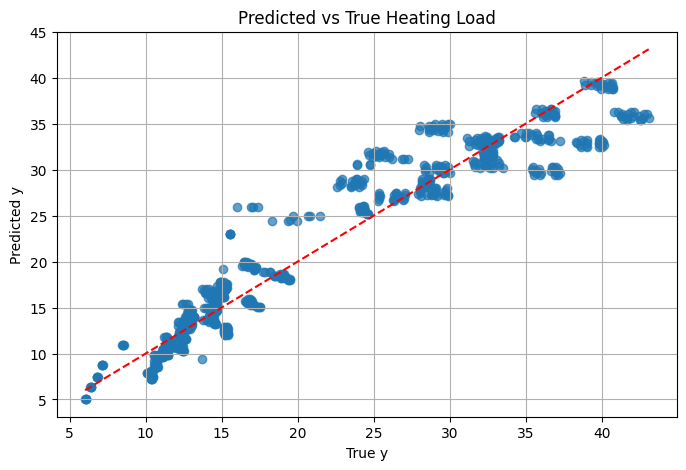

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(y, preds, alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title("Predicted vs True Heating Load")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.grid(True)
plt.show()

📘 Step 5: Plot Residuals

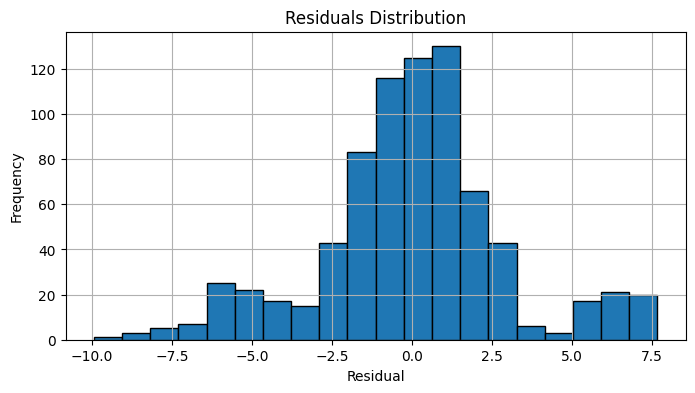

In [5]:
residuals = y - preds

plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

📘 Step 6: Visualize Coefficients

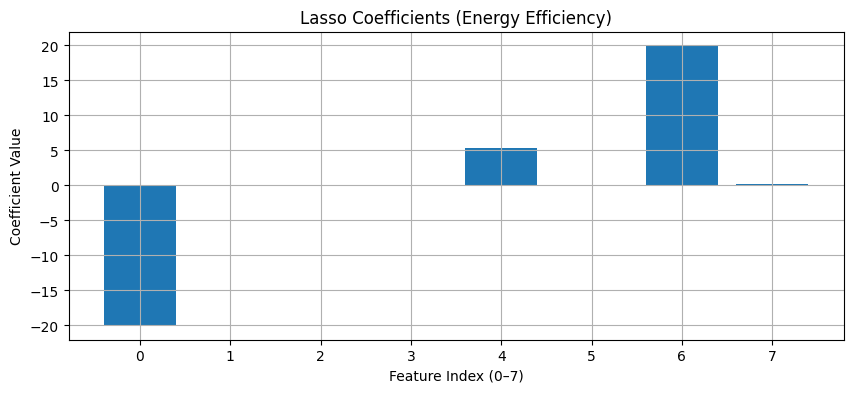

In [6]:
plt.figure(figsize=(10, 4))
plt.bar(range(len(coef)), coef)
plt.title("Lasso Coefficients (Energy Efficiency)")
plt.xlabel("Feature Index (0–7)")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

📘 Optional: Print MSE / R²

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, preds)
r2 = r2_score(y, preds)

print(f"📏 MSE: {mse:.4f}")
print(f"📈 R²: {r2:.4f}")

📏 MSE: 8.7390
📈 R²: 0.9141
